<a href="https://colab.research.google.com/github/Ravine28/imersao_Alura_IA_Google/blob/main/chatbot_embbendings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai
#-q --> instala somente o necessário
#-U --> faz o update

Importando as bibliotecas e configurando a API Key

In [8]:
#Importações e configurações iniciais
import numpy as np
import pandas as pd
import google.generativeai as genai

GOOGLE_API_KEY="API KEY"
genai.configure(api_key=GOOGLE_API_KEY)

Solicita os tipos de modelos disponíveis de embedding

In [3]:
for modelo in genai.list_models():
  if "embedContent" in modelo.supported_generation_methods:
    print(modelo.name)

models/embedding-001
models/text-embedding-004


Incluindo dados

In [17]:
#Listagem de documentos que serão buscados
DOCUMENT1 = {
    "Título": "Classificação taxonômica da Arara Canindé",
    "Conteúdo": "Reino: Animalia: Características gerais: Organismos multicelulares e eucarióticos, que se alimentam de outros seres vivos; Filo: Chordata: Características gerais: Presença de notocorda em pelo menos alguma fase do ciclo de vida, tubo nervoso dorsal e fendas faringeanas; Classe: Aves: Características gerais: Animais vertebrados, de sangue quente, que possuem penas e bicos sem dentes; Ordem: Psittaciformes: Características gerais: Aves conhecidas como psitacídeos, que incluem papagaios, araras e periquitos. Possuem pés zigodáctilos (dois dedos direcionados para frente e dois para trás); Família: Psittacidae: Características gerais: Aves conhecidas como papagaios verdadeiros, caracterizadas por seu bico curvo e forte e pela habilidade de imitar sons; Gênero: Ara: Características gerais: Gênero que inclui diversas espécies de araras, reconhecidas por sua plumagem colorida e bico poderoso; Espécie: Ara ararauna: Características gerais: Nome científico da arara-canindé, conhecida por sua plumagem predominantemente azul e amarela."}

DOCUMENT2 = {
    "Título": "Alimentação da Arara Canindé",
    "Conteúdo": "As araras-canindé são aves omnívoras, o que significa que sua dieta é composta por uma variedade de alimentos. Suas principais fontes de alimento incluem: Frutas: Elas consomem uma variedade de frutas, como cocos, mangas, mamões, bananas e frutas da palmeira; Sementes e nozes: Possuem um bico forte que lhes permite quebrar cascas de nozes e sementes duras, como as de palmeiras e castanhas; Insetos: Durante certas épocas do ano, as araras podem se alimentar de insetos, como besouros, larvas e formigas, complementando sua dieta com proteínas; Outros alimentos: Ocasionalmente, elas também podem consumir flores, brotos, néctar e até mesmo pequenos vertebrados, como lagartos e ovos de outros pássaros."}

DOCUMENT3 = {
    "Título": "Reprodução da Arara Canindé",
    "Conteúdo": "Cortejo e acasalamento: Durante a temporada de reprodução, os casais de araras-canindé realizam exibições de acasalamento, que incluem vocalizações, exibição de plumagem e movimentos elaborados; Ninho: Elas fazem seus ninhos em cavidades de árvores, geralmente em áreas altas e protegidas. O casal trabalha em conjunto para preparar o ninho e incubar os ovos; Postura de ovos: As araras-canindé geralmente botam de 2 a 3 ovos, com intervalos de alguns dias entre cada ovo; Incubação: A incubação dos ovos dura aproximadamente 25 a 28 dias e é realizada tanto pelo macho quanto pela fêmea; Cuidado com os filhotes: Ambos os pais participam ativamente do cuidado com os filhotes, alimentando, protegendo e mantendo o ninho limpo. Os filhotes são alimentados com uma dieta regurgitada pelos pais até estarem prontos para deixar o ninho; Expectativa de vida: A expectativa de vida da arara-canindé em ambiente selvagem varia, mas geralmente pode ser de até 50 anos. Em cativeiro, onde recebem cuidados adequados e alimentação balanceada, podem viver ainda mais, ultrapassando facilmente os 60 anos de idade."}

DOCUMENT4 = {
    "Título": "Distribuição da Arara Canindé",
    "Conteúdo": "As araras-canindé são nativas das florestas tropicais e subtropicais da América do Sul, incluindo países como Brasil, Paraguai, Argentina e partes do Uruguai. Elas são encontradas em uma variedade de habitats, desde florestas úmidas até savanas e cerrados. São frequentemente avistadas em áreas de vegetação densa, próximas a fontes de água."}

documents = [DOCUMENT1, DOCUMENT2, DOCUMENT3, DOCUMENT4]

Organizando dados conforme título e conteúdo

In [19]:
df = pd.DataFrame(documents)
df.columns = ["Titulo", "Conteudo"]
df

,Titulo,Conteudo
0,Classificação taxonômica da Arara Canindé,Reino: Animalia: Características gerais: Organ...
1,Alimentação da Arara Canindé,"As araras-canindé são aves omnívoras, o que si..."
2,Reprodução da Arara Canindé,Cortejo e acasalamento: Durante a temporada de...
3,Distribuição da Arara Canindé,As araras-canindé são nativas das florestas tr...


Inserindo gráfico dos dados

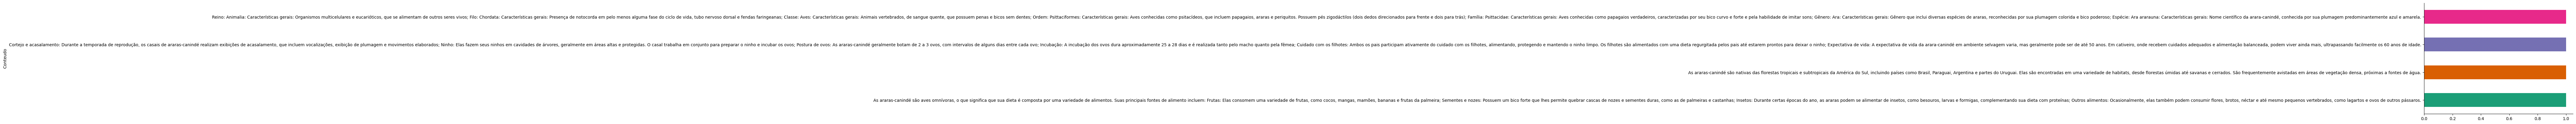

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Conteudo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

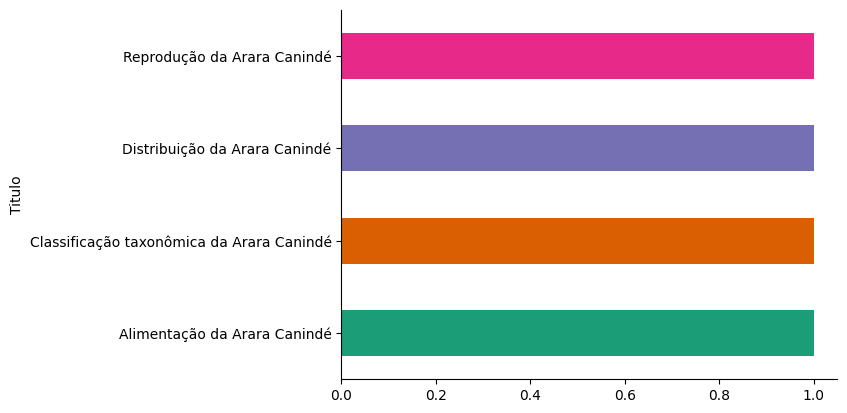

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Titulo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
model = "models/embedding-001"

In [25]:
def embed_fn(title, text):
  return genai.embed_content(model=model,
                                 content=text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")["embedding"]

Transformando o conteúdo em embeddings

In [32]:
df["Embeddings"] = df.apply(lambda row: embed_fn(row["Titulo"], row["Conteudo"]), axis=1)
df

,Titulo,Conteudo,Embeddings
0,Classificação taxonômica da Arara Canindé,Reino: Animalia: Características gerais: Organ...,"[0.026685936, -0.0131178005, -0.017203845, 0.0..."
1,Alimentação da Arara Canindé,"As araras-canindé são aves omnívoras, o que si...","[0.0043181647, -0.0048667514, -0.044594664, 0...."
2,Reprodução da Arara Canindé,Cortejo e acasalamento: Durante a temporada de...,"[-0.014228279, 0.01587929, -0.033570793, 0.083..."
3,Distribuição da Arara Canindé,As araras-canindé são nativas das florestas tr...,"[0.009925511, -0.0052041197, -0.040631235, 0.0..."


In [27]:
def gerar_e_buscar_consulta(consulta, base, model):
  embedding_da_consulta = genai.embed_content(model=model,
                                 content=consulta,
                                 task_type="RETRIEVAL_QUERY")["embedding"]

  produtos_escalares = np.dot(np.stack(df["Embeddings"]), embedding_da_consulta)

  indice = np.argmax(produtos_escalares)
  return df.iloc[indice]["Conteudo"]

In [38]:
consulta = "Qual o nome científico da Arara Canindé?."

trecho = gerar_e_buscar_consulta(consulta, df, model)
print(trecho)

Reino: Animalia: Características gerais: Organismos multicelulares e eucarióticos, que se alimentam de outros seres vivos; Filo: Chordata: Características gerais: Presença de notocorda em pelo menos alguma fase do ciclo de vida, tubo nervoso dorsal e fendas faringeanas; Classe: Aves: Características gerais: Animais vertebrados, de sangue quente, que possuem penas e bicos sem dentes; Ordem: Psittaciformes: Características gerais: Aves conhecidas como psitacídeos, que incluem papagaios, araras e periquitos. Possuem pés zigodáctilos (dois dedos direcionados para frente e dois para trás); Família: Psittacidae: Características gerais: Aves conhecidas como papagaios verdadeiros, caracterizadas por seu bico curvo e forte e pela habilidade de imitar sons; Gênero: Ara: Características gerais: Gênero que inclui diversas espécies de araras, reconhecidas por sua plumagem colorida e bico poderoso; Espécie: Ara ararauna: Características gerais: Nome científico da arara-canindé, conhecida por sua plu

In [40]:
generation_config = {
  "temperature": 1,
  "candidate_count": 1
}

In [42]:
prompt = f"Reescreva a resposta como se fosse um biólogo especialista em aves dando uma palestra para um grupo de alunos do ensino médio. Explique de forma descontraída como e porque é este o nome científico do animal, evite ser verboso e falar em tópicos: {trecho}"

model_2 = genai.GenerativeModel("gemini-1.0-pro",
                                generation_config=generation_config)
response = model_2.generate_content(prompt)
print(response.text)

"E aí, pessoal! Hoje, vamos falar de uma ave super legal e interessante: a arara-canindé. Vocês sabem que toda espécie tem um nome científico, né? E esse nome é como uma espécie de identidade única, que nos ajuda a diferenciá-las.

Então, vamos dar uma olhadinha no nome científico da arara-canindé: Ara ararauna. Essa belezinha faz parte da ordem das Psittaciformes, ou simplesmente "papagaios", que inclui até periquitos. Agora, dentro dos papagaios, temos a família Psittacidae, os "papagaios verdadeiros", que têm um bico poderoso e curvado e aquele talento incrível de imitar sons.

Mas o que mais tem nesse nome? O gênero Ara representa as próprias araras, que são conhecidas pela sua plumagem colorida e bico forte. E aí temos a espécie ararauna, que é a nossa arara-canindé, essa fofura azul e amarela. Cada pedacinho desse nome científico vem pra gente entender melhor a história evolutiva e as características únicas dessa ave incrível!"
